<a href="https://colab.research.google.com/github/leonlpz/Reconocimiento_de_Patrones/blob/main/IntroduccionClasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conceptos básicos de clasificación

- Se presentan los conceptos básicos clasificación.
- Clasificación Binaria.
    - Bases de datos linealmente separables.
- Clasificación de múltiples clases.



Para esta introducción se usa la base de datos Iris (El "Hola Mundo" de los clasificadores).

-   Consiste en identificar la especie de la flor Iris

-   Se usan medidas morfológicas como atributos.

-   Se estudian tres clases: Setosa, Versicolor y Virginica.


[Iris Dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris)








In [ ]:
from sklearn.datasets import load_iris
%matplotlib inline
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
iris = load_iris(as_frame=True)
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 1. Clasificación binaria

Como se puede observar, la base de datos iris configura un problema de clasificación de 3 clases (una para cada especie de flor iris). Sin embargo, para introducir el concepto de clasificación binaria, usamos dos clases: Setosa y No setosa.

#### 1.1 Datos linealmente separables.

En clasificación este es el escenario ideal, donde las clases se pueden separar a partir de rectas (para dos dimensiones, es decir dos atributos) o [hiperplanos](https://www.statdeveloper.com/wp-content/uploads/2020/02/SVM-2.png) para múltiples dimensiones (múltiples atributos).

Para este primer ejemplo, se usan únicamente dos atributos: Ancho y longitud del pétalo. Se eligen dos atributos con el fin de tener la capacidad de representar los datos a partir de un plano cartesiano (dos dimensiones)

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'setosa'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

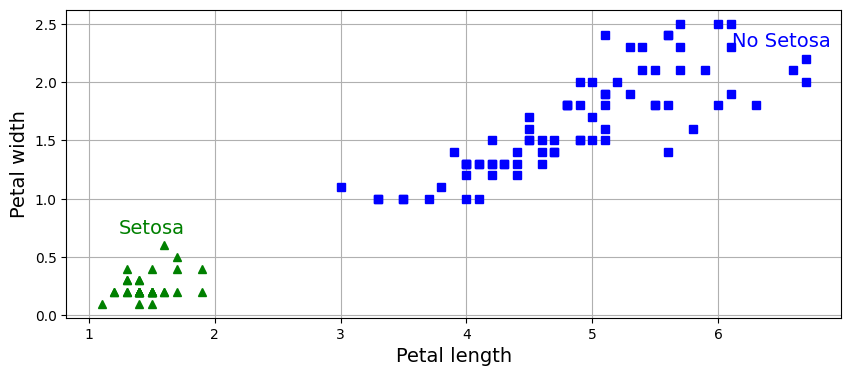

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.text(1.5, 0.7, "Setosa", color="g", ha="center")
plt.text(6.5, 2.3, "No Setosa", color="b", ha="center")
plt.grid()
plt.show()

Se puede observar como los datos de las dos clases pueden ser separados a partir de una línea recta

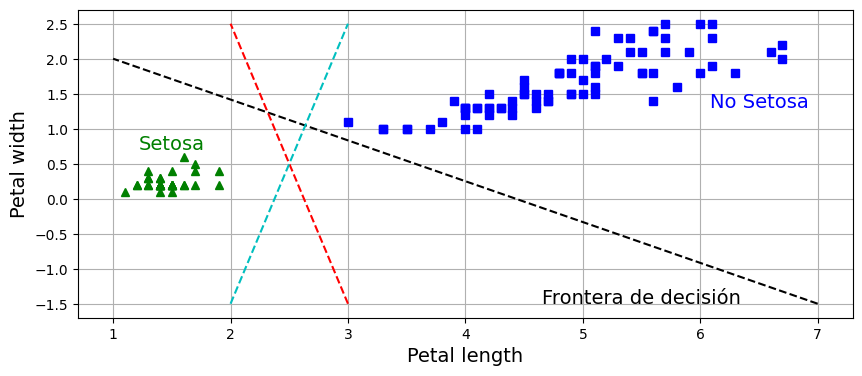

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
plt.plot([7,1], [-1.5,2], "k--") # posible recta 1
plt.plot([3,2], [-1.5,2.5], "r--") # posible recta 2
plt.plot([2,3], [-1.5,2.5], "c--") # posible recta 3
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.text(1.5, 0.7, "Setosa", color="g", ha="center")
plt.text(6.5, 1.3, "No Setosa", color="b", ha="center")
plt.text(5.5, -1.5, "Frontera de decisión", color="k", ha="center")
plt.grid()
plt.show()

Métodos lineales de clasificación, es decir, que usan líneas como fonteras de decisión:

-  Regresión Logística.
-  SVM (En casos específicos).

Sin embargo, en la práctica, generalmente las bases de datos No son linealmente separables. Para mostrar un ejemplo usamos la función de Sklearn, make_moons, la cual genera bases de datos sintéticas de dos atributos para clasificación binaria.

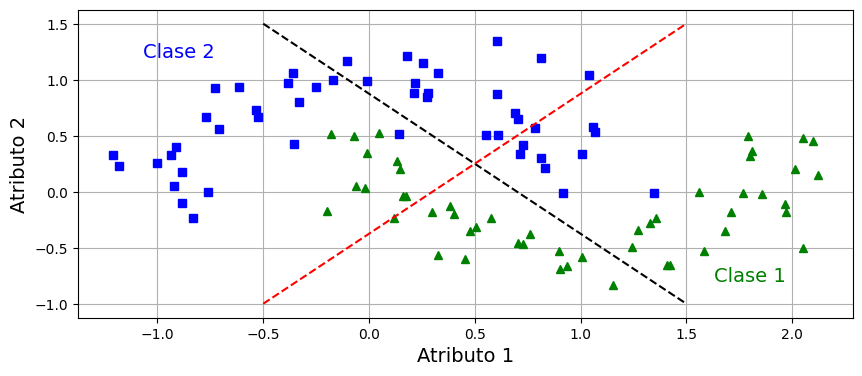

In [ ]:
X, y = make_moons(noise=0.2, random_state=0)
plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")
plt.text(1.8, -0.8, "Clase 1", color="g", ha="center")
plt.text(-0.9, 1.2, "Clase 2", color="b", ha="center")
plt.plot([-0.5,1.5], [1.5,-1], "k--") # posible recta 1
plt.plot([-0.5,1.5], [-1, 1.5], "r--") # posible recta 2
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.grid()
plt.show()

Es evidente que una recta (modelos lienales) no cumple, de forma satisfactoria, la tarea de clasificación. En este sentido, es necesario recurrir a modelos no que generen fronteras de decisión no lineales (modelos no lineales). Entre los métodos no lineales encontramos:

- K-vecinos.
- Árboles de decisión.
- Máquinas de soporte vectorial.

In [ ]:
# Este código tiene la intención de graficar regiones de decisión
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    # y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    # plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

Como ejemplo, se entrena una máquina de soporte vectorial.

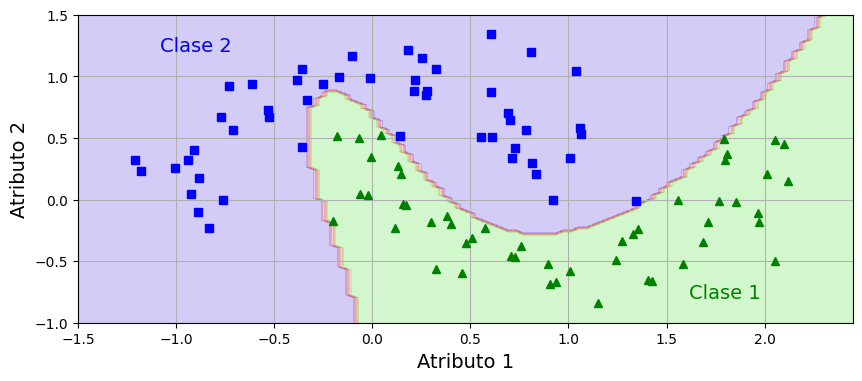

In [ ]:
svm_clf = SVC(kernel="poly", degree=10, coef0=100, C=5)
svm_clf.fit(X, y)
plt.figure(figsize=(10, 4))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")
plt.text(1.8, -0.8, "Clase 1", color="g", ha="center")
plt.text(-0.9, 1.2, "Clase 2", color="b", ha="center")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
plt.grid()
plt.show()

### 2. Clasificación con múltiples clases

Para este caso retomaremos la base de datos iris con dos atributos. Además, usaremos las tres clases que contiene.

In [ ]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

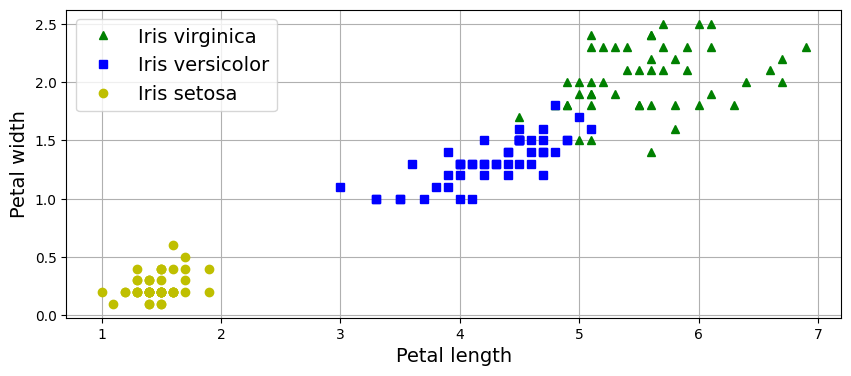

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()

La idea es dividir el espacio de entrada en tantas regiones como clases. Dicha división se puede lograr a partir de un arreglo de rectas (modelo lineal) o de curvas (modelos no lineales)

Como ejemplo se entrena un modelo de regresión logística (lineal)

In [ ]:
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

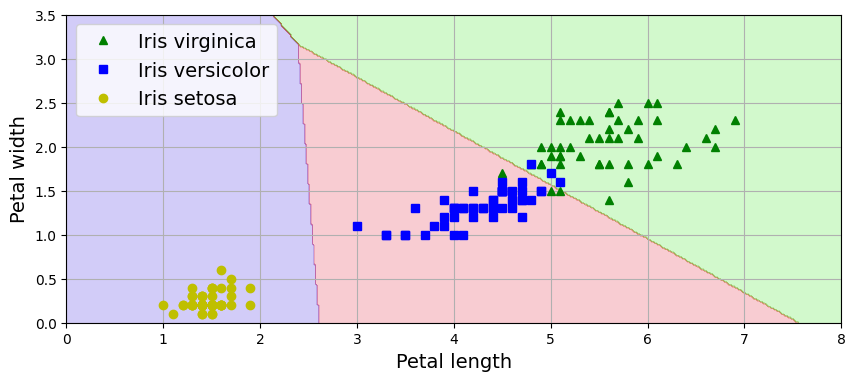

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")
plt.contourf(x0, x1, zz, cmap=plt.cm.brg, alpha=0.2)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.grid()